# 神經網路實做

## 拿取加權指數資料

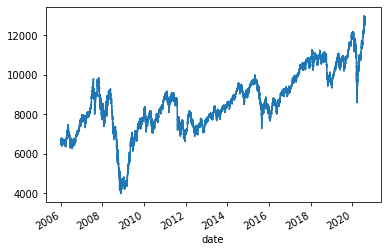

In [1]:
from finlab.data import Data
%matplotlib inline

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]
twii.plot()

## 製作features

In [2]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

## 刪除NaN

In [3]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (68571, 43)
after dropping NaN (66643, 43)


## 神經網路Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,...,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,66643.000000
mean,1.277436e-16,8.332345e-16,-2.081218e-15,-1.611833e-15,-2.947419e-15,-5.157700e-15,1.858240e-16,1.690582e-17,-1.654514e-17,-6.899859e-17,...,-1.922648e-15,1.023120e-16,-5.324299e-18,3.941181e-16,1.288860e-16,4.209662e-16,-7.934405e-16,-2.607174e-16,-1.976255e-16,1.000132
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008313
min,-4.430411e+00,-4.584212e+00,-4.891165e+00,-4.902955e+00,-4.882525e+00,-4.831511e+00,-1.022378e+01,-2.588044e+00,-2.684641e+00,-2.657653e+00,...,-5.440028e+00,-8.635787e+00,-7.818834e+00,-2.110713e+00,-1.961033e+00,-1.733588e+00,-1.659141e+00,-1.791093e+00,-1.925458e+00,0.924507
25%,-6.886745e-01,-6.892701e-01,-6.742066e-01,-6.649846e-01,-6.616835e-01,-6.493217e-01,-4.804277e-01,-6.430756e-01,-6.503126e-01,-6.288562e-01,...,-5.137208e-01,-4.898317e-01,-4.929649e-01,-7.369820e-01,-7.037247e-01,-7.483212e-01,-7.014938e-01,-6.910563e-01,-7.063699e-01,0.997045
50%,9.244996e-02,1.214734e-01,1.210136e-01,1.254195e-01,1.321886e-01,1.405660e-01,1.045689e-01,-1.190962e-02,-2.868697e-02,-7.644799e-03,...,1.239997e-01,8.327921e-02,9.285898e-02,-1.615794e-01,-2.333086e-01,-2.557205e-01,-2.356834e-01,-2.091704e-01,-1.900612e-01,1.000267
75%,7.277285e-01,7.207806e-01,6.968363e-01,7.058210e-01,7.073666e-01,7.062299e-01,6.067779e-01,6.552202e-01,6.709389e-01,5.987108e-01,...,5.641709e-01,5.884410e-01,6.044658e-01,5.984458e-01,4.843849e-01,5.008526e-01,4.767138e-01,4.439972e-01,5.531497e-01,1.003655
max,2.890788e+00,2.840481e+00,2.911296e+00,2.921670e+00,2.915377e+00,2.899779e+00,4.839249e+00,2.729909e+00,2.591726e+00,2.549347e+00,...,4.823699e+00,5.431553e+00,4.561873e+00,4.554255e+00,4.173653e+00,3.976500e+00,3.519582e+00,3.539684e+00,3.567033e+00,1.087726


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,...,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,6.664300e+04,66643.000000
mean,1.277436e-16,8.332345e-16,-2.081218e-15,-1.611833e-15,-2.947419e-15,-5.157700e-15,1.858240e-16,1.690582e-17,-1.654514e-17,-6.899859e-17,...,-1.922648e-15,1.023120e-16,-5.324299e-18,3.941181e-16,1.288860e-16,4.209662e-16,-7.934405e-16,-2.607174e-16,-1.976255e-16,1.000132
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.008313
min,-4.430411e+00,-4.584212e+00,-4.891165e+00,-4.902955e+00,-4.882525e+00,-4.831511e+00,-1.022378e+01,-2.588044e+00,-2.684641e+00,-2.657653e+00,...,-5.440028e+00,-8.635787e+00,-7.818834e+00,-2.110713e+00,-1.961033e+00,-1.733588e+00,-1.659141e+00,-1.791093e+00,-1.925458e+00,0.924507
25%,-6.886745e-01,-6.892701e-01,-6.742066e-01,-6.649846e-01,-6.616835e-01,-6.493217e-01,-4.804277e-01,-6.430756e-01,-6.503126e-01,-6.288562e-01,...,-5.137208e-01,-4.898317e-01,-4.929649e-01,-7.369820e-01,-7.037247e-01,-7.483212e-01,-7.014938e-01,-6.910563e-01,-7.063699e-01,0.997045
50%,9.244996e-02,1.214734e-01,1.210136e-01,1.254195e-01,1.321886e-01,1.405660e-01,1.045689e-01,-1.190962e-02,-2.868697e-02,-7.644799e-03,...,1.239997e-01,8.327921e-02,9.285898e-02,-1.615794e-01,-2.333086e-01,-2.557205e-01,-2.356834e-01,-2.091704e-01,-1.900612e-01,1.000267
75%,7.277285e-01,7.207806e-01,6.968363e-01,7.058210e-01,7.073666e-01,7.062299e-01,6.067779e-01,6.552202e-01,6.709389e-01,5.987108e-01,...,5.641709e-01,5.884410e-01,6.044658e-01,5.984458e-01,4.843849e-01,5.008526e-01,4.767138e-01,4.439972e-01,5.531497e-01,1.003655
max,2.890788e+00,2.840481e+00,2.911296e+00,2.921670e+00,2.915377e+00,2.899779e+00,4.839249e+00,2.729909e+00,2.591726e+00,2.549347e+00,...,4.823699e+00,5.431553e+00,4.561873e+00,4.554255e+00,4.173653e+00,3.976500e+00,3.519582e+00,3.539684e+00,3.567033e+00,1.087726


## 神經網路 Model

In [6]:
import keras.layers as layers
from keras.models import Sequential
import keras

model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
#model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="adam", )

Using TensorFlow backend.
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________


## 神經網路訓練

In [7]:
dataset_scaled_train = dataset_scaled[:'2015']


model.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1)

W1229 12:49:26.655866 4659422656 deprecation_wrapper.py:119] From /Users/cheng-yuhan/miniconda3/envs/finlab/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
45221/45221 [==============================] - 3s 69us/step - loss: 0.6908


## 回測

In [8]:
ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)

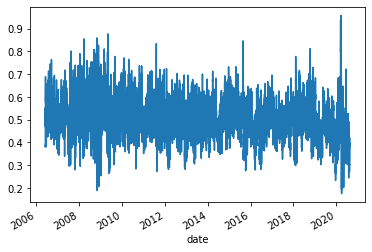

In [9]:
ey.plot()

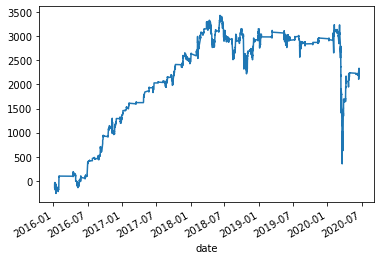

In [10]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0

eq = (gain[signal]['2016':]).cumsum()
eq.plot()

In [11]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2016':].sum()

858.0